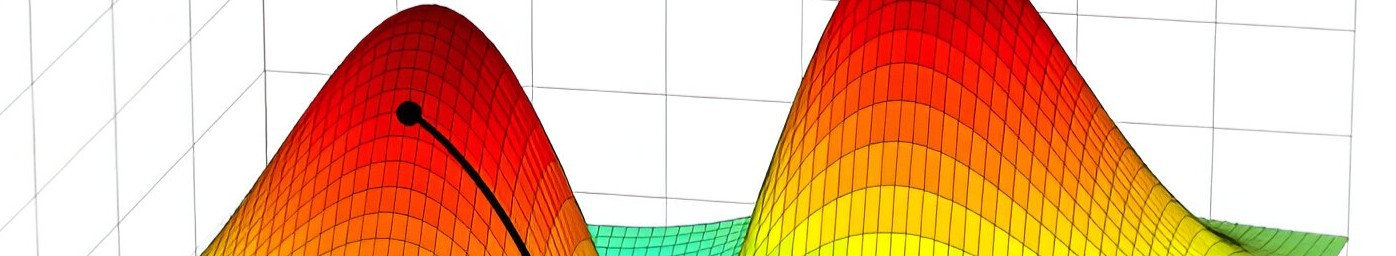

# Laboratorio 3 - Newton-Raphson y gradiente descendente
## Modelado, Simulación y Optimización - 202520
## Profesor de laboratorio: Juan Andrés Méndez

Estudiantes:

- Juan Miguel Delgado - 202314903
- Mauricio Urrego - 202211641

En este cuaderno se solucionarán los 5 problemas presentados en el laboratorio 3 de MOS.

In [ ]:
# installs
!pip install sympy

In [13]:
# imports
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

# Problema 1: Newton-Raphson en 2D para polinomios cúbicos

# Problema 2: Análisis de extremos locales y globales

# Problema 3: Newton-Raphson multidimensional

# Problema 4: Gradiente descendente en optimización

## Parte A: Implementación de Gradiente descendente en 3-D

## Formulación matemática

### Función objetivo

Queremos minimizar la siguiente función cuadrática:

$$
L(x, y) = (x - 2)^2 + (y + 1)^2
$$

Esta función mide la "distancia al punto $(2, -1)$" en el plano.
Su forma es la de un paraboloide convexo (como un bowl), lo que garantiza que existe un único mínimo global.

### Vector de parámetros

Definimos el vector de variables o parámetros como:

$$
{\theta} =
\begin{bmatrix}
x \\
y
\end{bmatrix}
$$

El objetivo del algoritmo de gradiente descendente será encontrar el valor de ${\theta}$ que minimiza $L(x,y)$.

### Gradiente (cálculo analítico)

El gradiente indica la dirección de máximo crecimiento de la función.
Derivando parcialmente respecto a $x$ y $y$:

$$
\nabla L(x,y) =
\begin{bmatrix}
\dfrac{\partial L}{\partial x}\\
\dfrac{\partial L}{\partial y}
\end{bmatrix} =
\begin{bmatrix}
2(x - 2)\\
2(y + 1)
\end{bmatrix}
$$

En gradiente descendente nos movemos en la dirección contraria a este vector para reducir el valor de $L$.

### Matriz Hessiana (curvatura de la función)

La Hessiana describe la curvatura local de la superficie:

$$
H(L) =
\begin{bmatrix}
\dfrac{\partial^2 L}{\partial x^2} & \dfrac{\partial^2 L}{\partial x \partial y} \\
\dfrac{\partial^2 L}{\partial y \partial x} & \dfrac{\partial^2 L}{\partial y^2}
\end{bmatrix} =
\begin{bmatrix}
2 & 0 \\
0 & 2
\end{bmatrix}
= 2I_2
$$

Es una matriz simétrica y definida positiva, lo que confirma que la función es convexa.
Los autovalores son $\lambda_1 = \lambda_2 = 2$.
El mayor autovalor ($L_g = 2$) es la constante de Lipschitz del gradiente, importante para definir el rango de pasos estables en el descenso.

### Regla de actualización (Gradiente Descendente)

En cada iteración $k$, el vector de parámetros se actualiza como:

$$
{\theta}*{k+1} = {\theta}*{k} - \alpha , \nabla L({\theta}_k)
$$

donde $\alpha > 0$ es el tamaño del paso
y $\nabla L({\theta}_k)$ es el gradiente en la iteración actual.

De otra forma:

$$
x_{k+1} = x_k - \alpha \cdot 2(x_k - 2)
$$

$$
y_{k+1} = y_k - \alpha \cdot 2(y_k + 1)
$$

### Condiciones de convergencia

En funciones cuadráticas convexas, el método converge si el paso $\alpha$ cumple:

$$
0 < \alpha < \frac{2}{L_g}
$$

Dado que $L_g = 2$, se obtiene:

$$
0 < \alpha < 1
$$

Si $\alpha$ es demasiado pequeño, el algoritmo será lento.
Si $\alpha \ge 1$, la secuencia diverge (el valor de $L$ crece en lugar de decrecer).

### Solución analítica (óptimo global)

Para encontrar el mínimo exacto, igualamos el gradiente a cero:

$$
\nabla L(x, y) = 0
\Rightarrow
\begin{cases}
2(x - 2) = 0 \\
2(y + 1) = 0
\end{cases}
\Rightarrow
x^\star = 2,\quad y^\star = -1
$$

El valor mínimo de la función es:

$$
L(2, -1) = 0
$$

Este es el punto al que debería converger el algoritmo.

### Criterios de parada (para detener el algoritmo)

El proceso iterativo debe detenerse cuando se cumpla alguna de las siguientes condiciones:

Gradiente pequeño:
$$
|\nabla L(\boldsymbol{\theta}_k)|_2 < \text{tol}
$$
(la función está cerca de un mínimo).

Cambio pequeño entre iteraciones:
$$
|\boldsymbol{\theta}_{k+1} - \boldsymbol{\theta}_k|_2 < \text{tol}
$$
(ya no hay progreso significativo).

Límite de iteraciones:
$$
k \ge k_{\max}
$$
(para evitar ciclos infinitos).

## Cálculo analítico del gradiente


A continuación calculamos analíticamente el gradiente de la función de pérdida con ayuda de `sympy`, corroborando los cálculos hechos anteriormente.

In [6]:
# definir variables simbólicas
x, y = sp.symbols('x y')

# definir la función de pérdida
L = (x - 2)**2 + (y + 1)**2

# calcular derivadas parciales
dL_dx = sp.diff(L, x)
dL_dy = sp.diff(L, y)

# construir el vector gradiente
grad_L = sp.Matrix([dL_dx, dL_dy])

# mostrar resultados
print("Función de pérdida L(x, y):")
display(L)

print("Gradiente de L(x, y):")
display(grad_L)


Función de pérdida L(x, y):


(x - 2)**2 + (y + 1)**2

Gradiente ∇L(x, y):


Matrix([
[2*x - 4],
[2*y + 2]])

## Implementación del algoritmo de gradiente descendente y trayectorias

A continuación, se presenta el código que implementa el algoritmo de gradiente descendente para minimizar la función cuadrática $(L(x, y) = (x - 2)^2 + (y + 1)^2)$. Primero, se define la función de pérdida y su gradiente analítico, que indica la dirección de mayor crecimiento de $L$. Luego, a partir de un punto inicial ($(-3, 4)$), el algoritmo actualiza los valores de $x$ y $y$ en dirección opuesta al gradiente, con una magnitud controlada por el parámetro de paso ($\alpha$). Se realizan múltiples ejecuciones del proceso para diferentes valores de ($\alpha$), registrando la trayectoria de los parámetros en el plano. 

Finalmente, graficamos la función y ponemos las trayectorias seguidas por el gradiente descendente para cada valor de $\alpha$, junto con el punto óptimo analítico ($(2, -1)$).

α = 0.05
  Iteraciones: 100
  Punto final: (x, y) = (1.999867193005562, -0.999867193005562)
  L(x, y) final = 3.52753955432896e-08
  Error respecto al óptimo = 0.0001878174527121737

α = 0.1
  Iteraciones: 64
  Punto final: (x, y) = (1.9999968614491324, -0.9999968614491324)
  L(x, y) final = 1.9701003097564248e-11
  Error respecto al óptimo = 4.4385812032184615e-06

α = 0.4
  Iteraciones: 10
  Punto final: (x, y) = (1.999999488, -0.999999488)
  L(x, y) final = 5.242879999028233e-13
  Error respecto al óptimo = 7.240773438679208e-07

α = 0.8
  Iteraciones: 32
  Punto final: (x, y) = (1.9999996020669444, -0.9999996020669444)
  L(x, y) final = 3.1670143350708814e-13
  Error respecto al óptimo = 5.627623241716596e-07



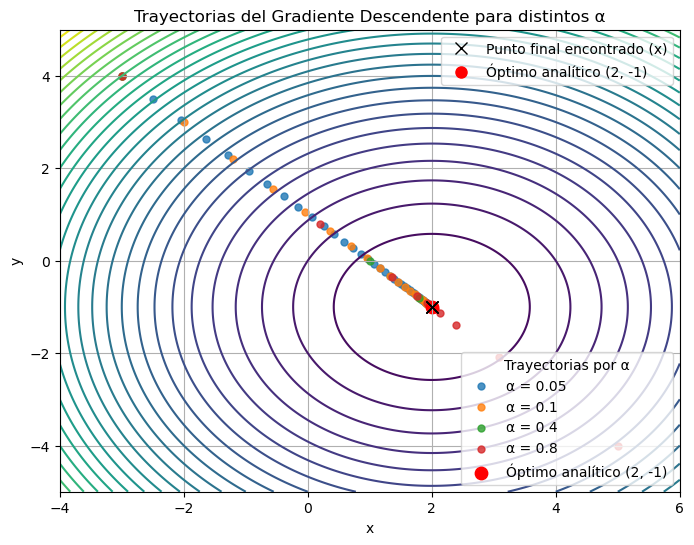

In [11]:
# definición de la función de pérdida y su gradiente
def L(x, y):
    return (x - 2)**2 + (y + 1)**2

def grad_L(x, y):
    # Gradiente analítico: grad L(x, y) = [2(x-2), 2(y+1)]
    dL_dx = 2 * (x - 2)
    dL_dy = 2 * (y + 1)
    return np.array([dL_dx, dL_dy])

# parametros iniciales
theta0 = np.array([-3.0, 4.0])   # punto inicial random
max_iter = 100
tol = 1e-6 # gradiente pequeño

# Valores de alfa  para comparar
alphas = [0.05, 0.1, 0.4, 0.8]

# Punto óptimo analítico
theta_star = np.array([2.0, -1.0])

# c reamos figura
fig, ax = plt.subplots(figsize=(8, 6))

# contorno de la función
x_vals = np.linspace(-4, 6, 200)
y_vals = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = L(X, Y)
ax.contour(X, Y, Z, levels=30, cmap="viridis")

# ejecutar gradiente descendente para cada alfa
for alpha in alphas:
    theta = theta0.copy()
    trayectoria = [theta.copy()]
    
    for k in range(max_iter):
        grad = grad_L(theta[0], theta[1])
        new_theta = theta - alpha * grad
        
        # criterio de parada
        if np.linalg.norm(new_theta - theta) < tol:
            break
        
        theta = new_theta
        trayectoria.append(theta.copy())
    
    trayectoria = np.array(trayectoria)
    
    # graficamos trayectoria 
    ax.scatter(trayectoria[:, 0], trayectoria[:, 1], s=25, label=f'α = {alpha}', alpha=0.8)
    ax.plot(trayectoria[-1, 0], trayectoria[-1, 1], 'x', color='black', markersize=8)

    # Calcular y mostrar resultados finales
    L_final = L(theta[0], theta[1])
    error = np.linalg.norm(theta - theta_star)
    print(f"α = {alpha}")
    print(f"  Iteraciones: {len(trayectoria)-1}")
    print(f"  Punto final: (x, y) = ({theta[0]}, {theta[1]})")
    print(f"  L(x, y) final = {L_final}")
    print(f"  Error respecto al óptimo = {error}\n")
    
# Marcar el punto óptimo analítico
ax.scatter(theta_star[0], theta_star[1], color='red', s=80, label='Óptimo analítico (2, -1)')

# labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Trayectorias del Gradiente Descendente para distintos α')
ax.legend()
plt.grid(True)

# Leyenda personalizada
custom_legend = [
    plt.Line2D([0], [0], color='black', marker='x', linestyle='', markersize=8, label='Punto final encontrado (x)'),
    plt.Line2D([0], [0], color='red', marker='o', linestyle='', markersize=8, label='Óptimo analítico (2, -1)'),
]
first_legend = ax.legend(handles=custom_legend, loc='upper right')
ax.add_artist(first_legend)
ax.legend(loc='lower right', title='Trayectorias por α')

plt.show()

En la gráfica se pueden ver los contornos de la función de pérdida y los puntos generados por el algoritmo de gradiente descendente para distintos valores de la tasa de aprendizaje $\alpha$ (se omite una línea que una los puntos para evitar superposiciones, sin embargo la trayectoria es evidente). Cada conjunto de puntos representa la trayectoria de actualización de los parámetros desde la posición inicial hacia el mínimo. Las X negras indican el punto final alcanzado por el algoritmo en cada caso, mientras que el círculo rojo marca el óptimo analítico ($(2, -1)$). 

Al variar el parámetro de paso $\alpha$, la velocidad y estabilidad de la convergencia cambian significativamente. Los valores pequeños garantizan una convergencia lenta pero estable, mientras que los valores grandes, aunque aceleran el proceso, pueden causar inestabilidad u oscilaciones si exceden el límite óptimo.

## Comparación con la solución analítica.

Los resultados obtenidos muestran que el algoritmo de gradiente descendente converge de manera muy precisa hacia la solución óptima analítica ($(x^\star, y^\star) = (2, -1)$) para todos los valores de $\alpha$ utilizados, aunque con diferentes velocidades. Para $\alpha = 0.05$, la convergencia es estable pero más lenta, alcanzando un error del orden de $10^{-4}$ tras 100 iteraciones. Al aumentar el paso a $\alpha = 0.1$, el algoritmo requiere menos iteraciones (64) y logra un error mucho menor. Con $\alpha = 0.4$, la convergencia se vuelve aún más rápida, alcanzando prácticamente el valor óptimo en solo 10 iteraciones, con un error de $7\times10^{-7}$. Incluso con $\alpha = 0.8$, que está cerca del límite teórico de estabilidad, el método sigue siendo preciso y converge en 32 iteraciones, con un error pequeño.

## Análisis la sensibilidad a $\alpha$ y estrategias para su elección óptima

El método de gradiente descendente es muy sensible al valor de la tasa de aprendizaje $\alpha$, ya que este parámetro controla el tamaño de los pasos que da el algoritmo hacia el mínimo. Si $\alpha$ es demasiado pequeño, el descenso es muy lento y necesita muchas iteraciones para acercarse al punto óptimo. Si, por el contrario, $\alpha$ es muy grande, el algoritmo puede oscilar alrededor del mínimo o incluso divergir, alejándose en lugar de acercarse. En este problema, se observó que valores intermedios como $\alpha = 0.4$ ofrecieron el mejor equilibrio entre rapidez y estabilidad, mientras que valores más pequeños tardaron más y valores cercanos al límite (como $\alpha = 0.8)$ fueron menos estables. 

En general, para elegir un buen $\alpha$, se recomienda empezar con un valor pequeño e ir aumentándolo gradualmente mientras la función de pérdida siga disminuyendo. De igual modo, para gradiente descendente con paso fijo existe un paso "óptimo" teórico que minimiza el factor de contracción lineal: $\alpha_{\text{opt}} = \dfrac{2}{\lambda_{\max}+\lambda_{\min}}$, y la tasa de convergencia depende del número de condición $\kappa=\lambda_{\max}/\lambda_{\min}$ (mejor cuando ($\kappa$ cercano a 1)*. En este problema $\lambda_{\min}=\lambda_{\max}=2$, de modo que $\alpha_{\text{opt}}=0.5$, lo que explica por qué valores intermedios como 0.4 dieron rápida convergencia sin inestabilidad. 

\* Optimization Bootcamp: Gradient Descent, https://faculty.washington.edu/sbrunton/OptimizationBootcamp.pdf, página 49.
  

## Parte B: Comparación entre Newton-Raphson y Gradiente Descendente


## Formulación matemática

De igual forma que hicimos la formulación matemática del punto A, ahora presentamos la formulación de la parte B:

### Función objetivo (a minimizar) 

$$
f(x,y) = (x-2)^2 (y+2)^2 + (x+1)^2 + (y-1)^2,\qquad (x_0,y_0)=(-2,-3)
$$

### Vector de parámetros:

$$
{\theta}=\begin{bmatrix} x \\ y \end{bmatrix}
$$

### Gradiente (cálculo analítico):

El gradiente de la función, que indica la dirección de máximo aumento del valor de la función.
$$
\nabla f(x,y)=
\begin{bmatrix}
\displaystyle \frac{\partial f}{\partial x} \\
\displaystyle \frac{\partial f}{\partial y}
\end{bmatrix}=
\begin{bmatrix}
2(x-2)(y+2)^2 + 2(x+1) \\
2(y+2)(x-2)^2 + 2(y-1)
\end{bmatrix}
$$

(Alternativamente, expandiendo los polinomios:)

$$
\nabla f(x,y)=
\begin{bmatrix}
2x y^{2} + 8 x y + 10 x - 4 y^{2} - 16 y - 14 \\
2 x^{2} y + 4 x^{2} - 8 x y - 16 x + 10 y + 14
\end{bmatrix}.
$$

Matriz Hessiana (componentes de segunda derivada):

$$
H_f(x,y)=
\begin{bmatrix}
\dfrac{\partial^2 f}{\partial x^2} & \dfrac{\partial^2 f}{\partial x\partial y} \\
\dfrac{\partial^2 f}{\partial y\partial x} & \dfrac{\partial^2 f}{\partial y^2}
\end{bmatrix}=
\begin{bmatrix}
2(y+2)^2 + 2 & 4(x-2)(y+2) \\
4(x-2)(y+2) & 2(x-2)^2 + 2
\end{bmatrix}.
$$

Esta función presenta una curvatura variable debido al término $(x-2)^2(y+2)^2$, lo que provoca que la superficie tenga regiones más pronunciadas y otras más planas. La Hessiana depende de los valores de $x$ y $y$, de modo que la forma de la superficie cambia con la posición en el plano. En el punto inicial $(x_0, y_0)=(-2,-3)$, la matriz Hessiana es invertible, pero su signo puede variar en otras zonas, lo que hace que no siempre sea definida positiva. Esto implica que el método de Newton puede no seguir una dirección estrictamente de descenso en toda la región, afectando su estabilidad dependiendo de la elección del paso.

### Reglas de actualización (algoritmos a comparar)

* **Gradiente Descendente:**

$$
{\theta}_{k+1} = {\theta}_k - \alpha,\nabla f({\theta}_k).
$$

* **Newton–Raphson:**

$$
{\theta}_{k+1} = {\theta}_k - \alpha, H_f({\theta}_k)^{-1},\nabla f({\theta}_k),
$$

siempre que $H_f(\boldsymbol{\theta}_k)$ sea invertible. 

### Criterios de parada

Los criterios de parada para ambos métodos se basan en medir cuándo el algoritmo deja de hacer progresos significativos. Se detiene cuando la norma del gradiente $|\nabla f({\theta}_k)|*2$ o el cambio entre iteraciones $|{\theta}*{k+1}-{\theta}_k|_2$ son menores que una tolerancia predefinida, o cuando se alcanza un número máximo de iteraciones.

## Cálculo analítico del gradiente y la matriz Hessiana

A continuación se calcula simbólicamente el gradiente y la Hessiana de la función, y se muestran los valores en el punto inicial.

In [12]:
# definimos symbols
x, y = sp.symbols('x y')

# definimos funcion 
f = (x - 2)**2 * (y + 2)**2 + (x + 1)**2 + (y - 1)**2

# gradiente simbólico
grad_f = sp.Matrix([sp.diff(f, x), sp.diff(f, y)])
grad_f_simpl = sp.simplify(grad_f)

# Hessian simbólico
H_f = sp.hessian(f, (x, y))
H_f_simpl = sp.simplify(H_f)

# resultados
print("Función simbólica f(x, y):")
display(f)

print("\nGradiente simbólico ∇f(x, y):")
display(grad_f_simpl)

print("\nHessiana simbólica H_f(x, y):")
display(H_f_simpl)

# creamos funciones callable
grad_np = sp.lambdify((x, y), grad_f_simpl, modules='numpy')
hess_np = sp.lambdify((x, y), H_f_simpl, modules='numpy')
f_np = sp.lambdify((x, y), f, modules='numpy')

# evaluamos  en (-2, -3)
x0, y0 = -2.0, -3.0
grad_at_init = np.array(grad_np(x0, y0), dtype=float).reshape(-1)
hess_at_init = np.array(hess_np(x0, y0), dtype=float)

print(f"\nEvaluación numérica en el punto inicial (x0, y0) = ({x0}, {y0}):")
print("Gradiente en el punto inicial:")
print(grad_at_init)

print("\nHessiana en el punto inicial:")
print(hess_at_init)

# calculamos condición de número punto inicial, para revisar si la función es invertible
try:
    cond_hess = np.linalg.cond(hess_at_init)
except Exception as e:
    cond_hess = np.inf

print(f"\nNúmero de condición de la Hessiana en el punto inicial: {cond_hess}")

# Also show the value of the function at the initial point
f_at_init = float(f_np(x0, y0))
print(f"\nValor de f en el punto inicial: {f_at_init:.6e}")

# devolvemos el gradiente la hesiana y la función callable
grad_np, hess_np, f_np

Función simbólica f(x, y):


(x - 2)**2*(y + 2)**2 + (x + 1)**2 + (y - 1)**2


Gradiente simbólico ∇f(x, y):


Matrix([
[2*x + 2*(x - 2)*(y + 2)**2 + 2],
[2*y + 2*(x - 2)**2*(y + 2) - 2]])


Hessiana simbólica H_f(x, y):


Matrix([
[ 2*(y + 2)**2 + 2, 4*(x - 2)*(y + 2)],
[4*(x - 2)*(y + 2),  2*(x - 2)**2 + 2]])


Evaluación numérica en el punto inicial (x0, y0) = (-2.0, -3.0):
Gradiente en el punto inicial:
[-10. -40.]

Hessiana en el punto inicial:
[[ 4. 16.]
 [16. 34.]]

Número de condición de la Hessiana en el punto inicial: 13.961708863162738

Valor de f en el punto inicial: 3.300000e+01


(<function _lambdifygenerated(x, y)>,
 <function _lambdifygenerated(x, y)>,
 <function _lambdifygenerated(x, y)>)

## Implementación algoritmos, resultados y visualización

Este código implementa y compara los métodos de gradiente Descendente y Newton–Raphson para encontrar el mínimo de la función $ f(x, y) = (x-2)^2 (y+2)^2 + (x+1)^2 + (y-1)^2 $, partiendo del punto inicial $(-2, -3)$. Para ambos métodos se prueban distintos valores del parámetro de paso $\alpha$, y se miden el número de iteraciones hasta la convergencia, el tiempo de ejecución, el error respecto al óptimo teórico y el valor final de la función. El código también genera una visualización gráfica donde se muestra el mapa de contornos de la función junto con las trayectorias de los algoritmos, marcando el punto inicial y el punto óptimo. Asimismo, se grafica la convergencia del error en escala logarítmica para ambos métodos y se presentan tablas con los resultados numéricos, permitiendo comparar la velocidad, precisión y robustez de cada enfoque frente a diferentes valores del parámetro de paso.


==== GRADIENTE DESCENDENTE ====

α = 0.01 | Iteraciones: 200 | Tiempo: 0.00500s | Error: 2.775e+00 | f(x,y): 8.004e+00
α = 0.05 | Iteraciones: 169 | Tiempo: 0.00400s | Error: 2.690e+00 | f(x,y): 8.000e+00
α = 0.10 | Iteraciones:  10 | Tiempo: 0.00000s | Error: 1.232e+00 | f(x,y): 8.552e+00
α = 0.40 | Iteraciones: 200 | Tiempo: 0.00800s | Error: nan | f(x,y): nan
α = 0.80 | Iteraciones: 200 | Tiempo: 0.01200s | Error: nan | f(x,y): nan

==== NEWTON–RAPHSON ====

α = 0.01 | Iteraciones: 200 | Tiempo: 0.01300s | Error: 5.162e+01 | f(x,y): 1.649e+06
α = 0.05 | Iteraciones: 200 | Tiempo: 0.01100s | Error: 2.690e+00 | f(x,y): 8.000e+00
α = 0.10 | Iteraciones: 131 | Tiempo: 0.00900s | Error: 2.690e+00 | f(x,y): 8.000e+00
α = 0.40 | Iteraciones:  31 | Tiempo: 0.00100s | Error: 1.232e+00 | f(x,y): 8.552e+00
α = 0.80 | Iteraciones:  26 | Tiempo: 0.00200s | Error: 1.232e+00 | f(x,y): 8.552e+00


<lambdifygenerated-1>:2: RuntimeWarning: overflow encountered in scalar multiply
  return array([[2*x + 2*(x - 2)*(y + 2)**2 + 2], [2*y + 2*(x - 2)**2*(y + 2) - 2]])
C:\Users\mauri\AppData\Local\Temp\ipykernel_9428\1490059766.py:32: RuntimeWarning: invalid value encountered in subtract
  new_theta = theta - alpha * grad
<lambdifygenerated-1>:2: RuntimeWarning: overflow encountered in scalar power
  return array([[2*x + 2*(x - 2)*(y + 2)**2 + 2], [2*y + 2*(x - 2)**2*(y + 2) - 2]])


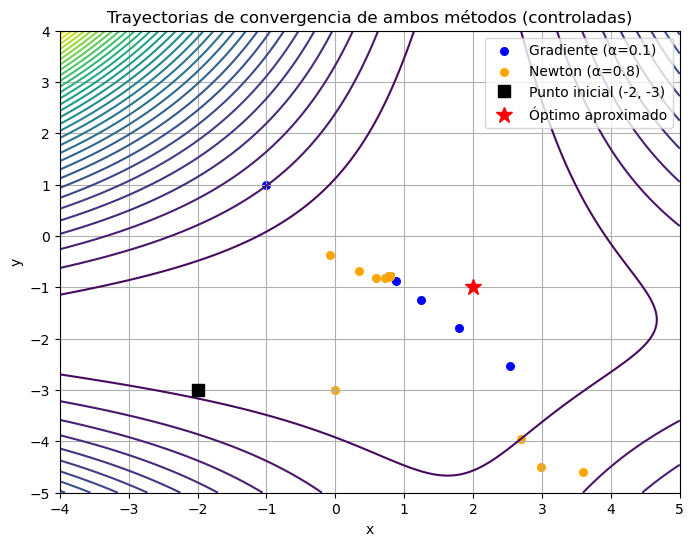

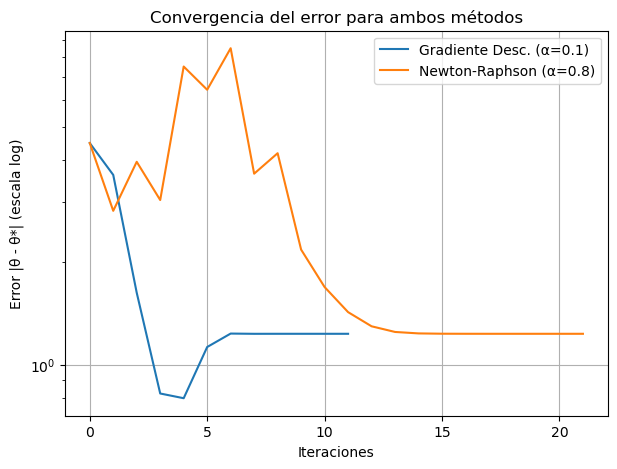


=== Resultados: Gradiente Descendente ===


,α,Iteraciones,Tiempo (s),Error final,"f(x,y) final"
0,0.01,200,0.004997,2.775278,8.004431
1,0.05,169,0.004000,2.690010,8.000000
2,0.10,10,0.000000,1.232036,8.551663
3,0.40,200,0.008004,NaN,NaN
4,0.80,200,0.011996,NaN,NaN



=== Resultados: Newton–Raphson ===


,α,Iteraciones,Tiempo (s),Error final,"f(x,y) final"
0,0.01,200,0.012999,51.616947,1.649149e+06
1,0.05,200,0.010998,2.689893,8.000000e+00
2,0.10,131,0.008998,2.689985,8.000000e+00
3,0.40,31,0.001001,1.232037,8.551663e+00
4,0.80,26,0.002002,1.232035,8.551663e+00


In [15]:
# Punto inicial
x0, y0 = -2.0, -3.0
thetas_init = np.array([x0, y0])

# Parámetros de parada y prueba
tol = 1e-6             # tolerancia para detener el algoritmo
max_iter = 200         # máximo de iteraciones permitidas
alphas = [0.01, 0.05, 0.1, 0.4, 0.8]  # distintos valores de paso α

# Óptimo analítico aproximado (para medir error)
theta_star = np.array([2.0, -1.0])

# Función auxiliar: distancia al óptimo (norma Euclidiana)
def error_norm(theta):
    return np.linalg.norm(theta - theta_star)


print("==== GRADIENTE DESCENDENTE ====\n")
gd_results = []  # lista para guardar resultados

for alpha in alphas:
    # Inicializar parámetros
    theta = thetas_init.copy()
    start_time = time.time()  # medir tiempo de ejecución
    trayectoria = [theta.copy()]  # almacenar trayectoria de puntos
    
    # Iteraciones del método
    for k in range(max_iter):
        grad = np.array(grad_np(theta[0], theta[1]), dtype=float).reshape(-1)
        
        # Regla de actualización: θ_{k+1} = θ_k - α ∇f(θ_k)
        new_theta = theta - alpha * grad
        trayectoria.append(new_theta.copy())
        
        # Criterio de parada (cuando el cambio es muy pequeño)
        if np.linalg.norm(new_theta - theta) < tol:
            break
        
        # Actualizar parámetro
        theta = new_theta
    
    end_time = time.time()
    
    # Evaluar resultados finales
    err = error_norm(theta)                # error respecto al óptimo
    tiempo = end_time - start_time         # tiempo total
    L_final = f_np(theta[0], theta[1])     # valor final de la función
    
    # Guardar resultados
    gd_results.append((alpha, k+1, tiempo, err, L_final))
    
    # Mostrar resultados en consola
    print(f"α = {alpha:.2f} | Iteraciones: {k+1:3d} | "
          f"Tiempo: {tiempo:.5f}s | Error: {err:.3e} | f(x,y): {L_final:.3e}")


#  NEWTON–RAPHSON

print("\n==== NEWTON–RAPHSON ====\n")
newton_results = []  # lista para guardar resultados

for alpha in alphas:
    # Inicializar parámetros
    theta = thetas_init.copy()
    start_time = time.time()
    trayectoria_N = [theta.copy()]
    
    # Iteraciones del método de Newton
    for k in range(max_iter):
        grad = np.array(grad_np(theta[0], theta[1]), dtype=float).reshape(-1)
        H = np.array(hess_np(theta[0], theta[1]), dtype=float)
        
        # Resolver el sistema H * step = grad  ->  step = H^{-1} * grad
        try:
            step = np.linalg.solve(H, grad)
        except np.linalg.LinAlgError:
            # Si la Hessiana no se puede invertir, se detiene el proceso
            print(f"α={alpha}: Hessiana no invertible en iteración {k}")
            break
        
        # Regla de actualización: θ_{k+1} = θ_k - α * H^{-1}∇f(θ_k)
        new_theta = theta - alpha * step
        trayectoria_N.append(new_theta.copy())
        
        # Criterio de parada
        if np.linalg.norm(new_theta - theta) < tol:
            break
        
        # Actualizar
        theta = new_theta
    
    end_time = time.time()
    
    # Evaluar resultados finales
    err = error_norm(theta)
    tiempo = end_time - start_time
    L_final = f_np(theta[0], theta[1])
    
    # Guardar resultados
    newton_results.append((alpha, k+1, tiempo, err, L_final))
    
    # Mostrar resultados en consola
    print(f"α = {alpha:.2f} | Iteraciones: {k+1:3d} | "
          f"Tiempo: {tiempo:.5f}s | Error: {err:.3e} | f(x,y): {L_final:.3e}")



# VISUALIZACIÓN 

fig, ax = plt.subplots(figsize=(8, 6))

# Crear mapa de contornos centrado en la región del óptimo
x_vals = np.linspace(-4, 5, 300)
y_vals = np.linspace(-5, 4, 300)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f_np(X, Y)
ax.contour(X, Y, Z, levels=40, cmap="viridis")

# Función auxiliar: trayectoria con control de paso
def get_traj(method, alpha, max_step=5):
    theta = thetas_init.copy()
    trayectoria = [theta.copy()]
    for _ in range(max_iter):
        grad = np.array(grad_np(theta[0], theta[1]), dtype=float).reshape(-1)
        if method == 'gd':
            step = alpha * grad
        else:  # método de Newton
            H = np.array(hess_np(theta[0], theta[1]), dtype=float)
            try:
                step = np.linalg.solve(H, grad)
            except np.linalg.LinAlgError:
                break
            step *= alpha

        # Limitamos el tamaño del paso para evitar saltos muy grandes
        if np.linalg.norm(step) > max_step:
            step = step * (max_step / np.linalg.norm(step))

        new_theta = theta - step
        trayectoria.append(new_theta.copy())

        if np.linalg.norm(new_theta - theta) < tol:
            break
        theta = new_theta
    return np.array(trayectoria)

# Volver a calcular trayectorias usando los mejores α
traj_gd = get_traj('gd', alpha_gd_opt)
traj_nt = get_traj('nt', alpha_nt_opt)

# Graficar trayectorias
ax.scatter(traj_gd[:,0], traj_gd[:,1], s=30, color='blue', label=f'Gradiente (α={alpha_gd_opt})')
ax.scatter(traj_nt[:,0], traj_nt[:,1], s=30, color='orange', label=f'Newton (α={alpha_nt_opt})')

# Marcar punto inicial y óptimo
ax.plot(x0, y0, 'ks', markersize=8, label='Punto inicial (-2, -3)')
ax.plot(theta_star[0], theta_star[1], 'r*', markersize=12, label='Óptimo aproximado')

# Mejorar presentación del gráfico
ax.set_xlim(-4, 5)
ax.set_ylim(-5, 4)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Trayectorias de convergencia de ambos métodos (controladas)')
ax.legend()
ax.grid(True)
plt.show()



# CONVERGENCIA DEL ERROR (ESCALA LOGARÍTMICA)

fig, ax = plt.subplots(figsize=(7, 5))

# Función auxiliar: curva de error por iteración
def error_curve(traj):
    return [np.linalg.norm(t - theta_star) for t in traj]

# Calcular errores
err_gd = error_curve(traj_gd)
err_nt = error_curve(traj_nt)

# Gráfico en escala logarítmica
ax.semilogy(err_gd, label=f'Gradiente Desc. (α={alpha_gd_opt})')
ax.semilogy(err_nt, label=f'Newton-Raphson (α={alpha_nt_opt})')

ax.set_xlabel('Iteraciones')
ax.set_ylabel('Error |θ - θ*| (escala log)')
ax.set_title('Convergencia del error para ambos métodos')
ax.legend()
ax.grid(True)
plt.show()



# TABLA DE RESULTADOS FINALES


cols = ["α", "Iteraciones", "Tiempo (s)", "Error final", "f(x,y) final"]
df_gd = pd.DataFrame(gd_results, columns=cols)
df_nt = pd.DataFrame(newton_results, columns=cols)

print("\n=== Resultados: Gradiente Descendente ===")
display(df_gd)

print("\n=== Resultados: Newton–Raphson ===")
display(df_nt)


## Análisis comparativo:
En este problema, el método de gradiente descendente mostró un comportamiento más estable y robusto frente a cambios en el parámetro de paso $\alpha$, aunque necesitó un mayor número de iteraciones para acercarse al mínimo. Con valores pequeños de $\alpha$ (0.01–0.05) el avance fue lento pero seguro, mientras que con pasos mayores (0.4–0.8) la función se volvió inestable y los valores numéricos divergieron, produciendo errores tipo *NaN*. Su tiempo de ejecución fue ligeramente mayor, pero constante, y su precisión final fue moderada, con errores residuales cercanos a 1.2 en el mejor caso. En contraste, el método de Newton–Raphson logró converger en menos iteraciones (alrededor de 30) cuando el paso fue adecuado, mostrando una reducción drástica del error en pocas actualizaciones. Sin embargo, su desempeño fue mucho más sensible al valor de $\alpha$. Pasos demasiado pequeños o grandes provocaron divergencia o saltos fuera del valle de la función. Además, cada iteración implicó un mayor costo computacional por el cálculo e inversión de la Hessiana, lo que lo hace más exigente en tiempo de cómputo individual aunque converja más rápido en número de pasos.

## Tabla comparativa

| Método                    | Iteraciones típicas | Tiempo de ejecución |    Precisión final    |                 Robustez al paso α                 |   Costo computacional por iteración  | Ventajas principales                 | Desventajas principales                              |
| :------------------------ | :-----------------: | :-----------------: | :-------------------: | :------------------------------------------------: | :----------------------------------: | :----------------------------------- | :--------------------------------------------------- |
| **Gradiente Descendente** |        10–200       |         Bajo        |        Moderada       |         Alta (solo falla con pasos grandes)        |                 Bajo                 | Estable, fácil de implementar        | Convergencia lenta, sensible a curvaturas            |
| **Newton–Raphson**        |        26–31        |       Muy bajo      | Alta cerca del óptimo | Baja (puede divergir con pasos pequeños o grandes) | Alto (requiere Hessiana e inversión) | Convergencia rápida cerca del mínimo | Inestable lejos del óptimo, alto costo por iteración |


## Conclusión:

Para esta función en particular, que posee curvaturas muy variables y una topografía irregular, el método de gradiente descendente resulta más adecuado al ofrecer una convergencia más estable y predecible, incluso si requiere más iteraciones. El método de Newton–Raphson es más eficiente cerca del mínimo —donde la Hessiana refleja bien la curvatura local—, pero es más propenso a inestabilidades cuando el punto inicial está lejos del óptimo o el paso no se calibra correctamente. En términos generales, Newton es preferible en funciones bien condicionadas y suaves, donde la Hessiana sea positiva definida y fácilmente invertible, mientras que el gradiente descendente es más confiable en funciones no cuadráticas, mal condicionadas o con regiones de curvatura cambiante, como la analizada aquí.


# Problema 5: Descenso de gradiente y descenso de gradiente basado en momento

La solución a este problema se encuentra adjunto. También se puede consultar accediendo a https://github.com/MOS-laboratories/lab3.